#### Analysis in R for the bike project! (first notebook wasn't great)



By Amanda Worthy 

In [36]:
install.packages('corrplot')
library(corrplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.92 loaded


In [37]:
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)

options(repr.plot.width=8, repr.plot.height=6) #controls plot size in jupyter

In [38]:
#import dataset 
df<- read.csv("Data/Bike_AQI_Weather.csv")
head(df)
colnames(df)

df$Date= as.Date(df$Date)
df$DOY= as.Date(df$DOY)
df

Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,precip_accum_one_hour_set_1,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East
Seattle Beacon Hill,2012-01-01 00:00:00,NA,NA,NA,10,NA,10.3,71,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01 01:00:00,NA,NA,NA,30,NA,3.0,64,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01 02:00:00,NA,NA,NA,30,NA,2.3,65,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01 03:00:00,NA,NA,NA,30,NA,NA,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01 04:00:00,NA,NA,NA,20,NA,3.5,67,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01 05:00:00,NA,NA,NA,30,NA,2.3,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA


[1] "Site"                         "Date"                        
 [3] "CO"                           "NO2"                         
 [5] "NO2_caps"                     "ozone"                       
 [7] "PM2.5_MO"                     "PM2.5_FEM"                   
 [9] "RH"                           "SO2"                         
[11] "Temperature"                  "Temperature_10_m"            
[13] "Wind_Direction_s"             "Wind_Direction_v"            
[15] "Wind_Speed_p"                 "Wind_Speed_s"                
[17] "DOY"                          "Ozone_8hr_avg"               
[19] "PM2.5_MO_24hr_avg"            "PM2.5_FEM_24hr_avg"          
[21] "CO_8hr_avg"                   "PM2.5MO_SubIndex"            
[23] "PM2.5FEM_SubIndex"            "PM2.5_1hrMO_SubIndex"        
[25] "PM2.5_1hrFEM_SubIndex"        "X03_SubIndex"                
[27] "CO_SubIndex"                  "SO2_SubIndex"                
[29] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[31] "AQI_calculated"               "AQI_bucket_calculated"       
[33] "AQI_calculated_where"         "AQI_Cause"                   
[35] "precip_accum_one_hour_set_1"  "Fremont.Bridge.Total"        
[37] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[39] "Spokane.St..Bridge.Total"     "West"                        
[41] "East"

Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,precip_accum_one_hour_set_1,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East
Seattle Beacon Hill,2012-01-01,NA,NA,NA,10,NA,10.3,71,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,3.0,64,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,2.3,65,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,NA,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,20,NA,3.5,67,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,2.3,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,NA,NA,6.4,78,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,NA,NA,9.1,80,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,NA,NA,9.5,77,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,10,NA,11.0,72,NA,...,Good,PM2.5MO_SubIndex,PM2.5,0.03,NA,NA,NA,NA,NA,NA


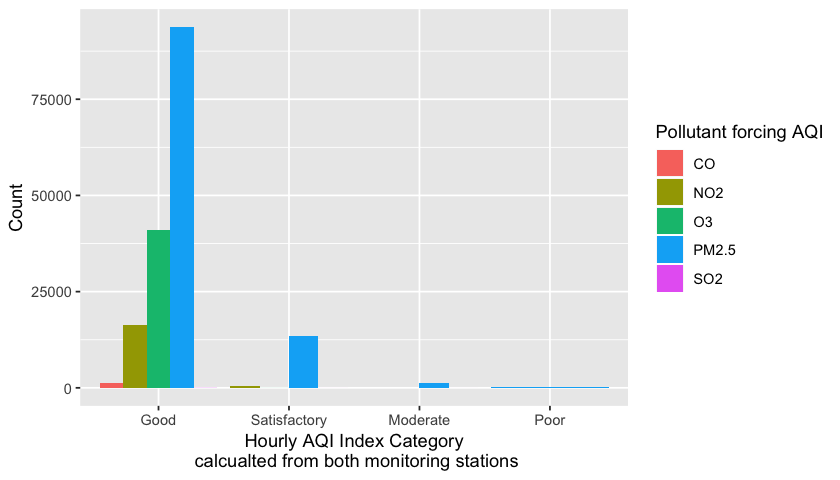

In [39]:
options(repr.plot.width=7, repr.plot.height=4)

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
df <- arrange(transform(df,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

ggplot(df, aes(x=AQI_bucket_calculated, fill=AQI_Cause))  + 
    geom_bar(position="dodge") +
    xlab('Hourly AQI Index Category\n calcualted from both monitoring stations') +
    ylab('Count') +
    guides(fill=guide_legend(title="Pollutant forcing AQI"))


In [40]:
AQI_count_class <- df %>% 
  group_by(Site, AQI_bucket_calculated,) %>% 
  summarise(number_of_cases = n())

AQI_count_class

Site,AQI_bucket_calculated,number_of_cases
Seattle 10th & Weller,Good,67524
Seattle 10th & Weller,Satisfactory,5298
Seattle 10th & Weller,Moderate,637
Seattle 10th & Weller,Poor,63
Seattle Beacon Hill,Good,84754
Seattle Beacon Hill,Satisfactory,8588
Seattle Beacon Hill,Moderate,670
Seattle Beacon Hill,Poor,63


In [41]:
head((df)[36])

Fremont.Bridge.Total
NA
NA
NA
NA
NA
NA


In [42]:
names(df)[36] <- "Fremont_Total"
names(df)[37] <- "Fremont_East"
names(df)[38] <- "Fremont_West"
names(df)[39] <- "Spokane_Total"
names(df)[40] <- "Spokane_West"
names(df)[41] <- "Spokane_East"
head(df)

Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,precip_accum_one_hour_set_1,Fremont_Total,Fremont_East,Fremont_West,Spokane_Total,Spokane_West,Spokane_East
Seattle Beacon Hill,2012-01-01,NA,NA,NA,10,NA,10.3,71,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,3.0,64,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,2.3,65,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,NA,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,20,NA,3.5,67,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA
Seattle Beacon Hill,2012-01-01,NA,NA,NA,30,NA,2.3,66,NA,...,Good,PM2.5MO_SubIndex,PM2.5,NA,NA,NA,NA,NA,NA,NA


In [43]:
#write.csv(df, 'Data/To_Liz.csv', row.names = FALSE)

In [44]:
library(lubridate)
library(data.table)

In [45]:
#import dataset 
dfD<- read.csv("Data/Daily_Bike_AQI_Weather.csv")
#head(dfD)

dfD$Date= as.Date(dfD$Date)

beaconD <-subset(dfD, Site == 'Seattle Beacon Hill')
beaconD= beaconD %>% select_if(~ !all(is.na(.)))
head(beaconD)
colnames(beaconD)

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)

beaconD2 <- arrange(transform(beaconD,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

,X,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Spokane.St..Bridge.Total,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause
3084,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,NA,...,NA,NA,NA,NA,NA,NA,0.12000,Good,PM2.5FEM_SubIndex,PM2.5
3085,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,NA,...,NA,NA,NA,NA,NA,NA,0.25000,Good,PM2.5FEM_SubIndex,PM2.5
3086,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,NA,...,NA,NA,NA,NA,NA,NA,10.49500,Good,PM2.5FEM_SubIndex,PM2.5
3087,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,NA,...,NA,NA,NA,NA,NA,NA,14.98833,Good,PM2.5FEM_SubIndex,PM2.5
3088,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,NA,...,NA,NA,NA,NA,NA,NA,5.62000,Good,PM2.5FEM_SubIndex,PM2.5
3089,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,NA,...,NA,NA,NA,NA,NA,NA,0.75000,Good,PM2.5FEM_SubIndex,PM2.5


[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2_caps"                     "ozone"                       
 [7] "PM2.5_MO"                     "PM2.5_FEM"                   
 [9] "RH"                           "SO2"                         
[11] "Temperature"                  "Temperature_10_m"            
[13] "Wind_Direction_s"             "Wind_Direction_v"            
[15] "Wind_Speed_p"                 "Wind_Speed_s"                
[17] "Ozone_8hr_avg"                "PM2.5_MO_24hr_avg"           
[19] "PM2.5_FEM_24hr_avg"           "CO_8hr_avg"                  
[21] "PM2.5MO_SubIndex"             "PM2.5FEM_SubIndex"           
[23] "PM2.5_1hrMO_SubIndex"         "PM2.5_1hrFEM_SubIndex"       
[25] "X03_SubIndex"                 "CO_SubIndex"                 
[27] "SO2_SubIndex"                 "NO2_SubIndex"                
[29] "NO2_CAPS_SubIndex"            "AQI_calculated"              
[31] "Fremont.Bridge.Total"         "Fremont.Bridge.East.Sidewalk"
[33] "Fremont.Bridge.West.Sidewalk" "Spokane.St..Bridge.Total"    
[35] "West"                         "East"                        
[37] "precip_accum_one_hour_set_1"  "AQI_bucket_calculated"       
[39] "AQI_calculated_where"         "AQI_Cause"

In [241]:
df$mPM = df$PM2.5_FEM  # your new merged column start with x
df$mPM[!is.na(df$PM2.5_MO)] = df$PM2.5_MO[!is.na(df$PM2.5_MO)]  # merge with y

#df$mpm
#head(df,3)

df$mNO2 = df$NO2  # your new merged column start with x
df$mNO2[!is.na(df$NO2_caps)] = df$NO2_caps[!is.na(df$NO2_caps)]  # merge with y

#df$mpm
#head(df,3)

dfD$mPM = dfD$PM2.5_FEM  # your new merged column start with x
dfD$mPM[!is.na(dfD$PM2.5_MO)] = dfD$PM2.5_MO[!is.na(dfD$PM2.5_MO)]  # merge with y

#df$mpm
#head(dfD,3)

dfD$mNO2 = dfD$NO2  # your new merged column start with x
dfD$mNO2[!is.na(dfD$NO2_caps)] = dfD$NO2_caps[!is.na(dfD$NO2_caps)]  # merge with y

dfD$mWS = dfD$Wind_Speed_p  # your new merged column start with x
dfD$mWS[!is.na(dfD$Wind_Speed_s)] = dfD$Wind_Speed_s[!is.na(dfD$Wind_Speed_s)]  # merge with y

dfD$mWD = dfD$Wind_Direction_s  # your new merged column start with x
dfD$mWD[!is.na(dfD$Wind_Direction_v)] = dfD$Wind_Direction_v[!is.na(dfD$WWind_Direction_v)]  # merge with y


#df$mpm
head(dfD,3)

X,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,NA,NA,9.100000,NA,...,729,789,0.00,Good,PM2.5FEM_SubIndex,PM2.5,9.100000,NA,NA,NA
1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,NA,NA,8.336364,NA,...,756,795,0.00,Good,PM2.5FEM_SubIndex,PM2.5,8.336364,NA,NA,NA
2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,NA,NA,6.591667,NA,...,359,392,3.14,Good,PM2.5FEM_SubIndex,PM2.5,6.591667,NA,NA,NA


In [242]:
#unique(beaconD2$AQI_calculated)
max(beaconD2$AQI_calculated)

[1] 224.9583



ggplot(beaconD2, aes(x = Date, y = Spokane.St..Bridge.Total, color = AQI_bucket_calculated)) +
     #geom_line(size = 1)+
geom_area(aes(fill=AQI_bucket_calculated), position = 'stack') +
ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))



In [68]:
#Use FEM for Beacon

beacon <-subset(dfD, Site == 'Seattle Beacon Hill')
beacon= beacon %>% select_if(~ !all(is.na(.)))
head(beacon)

,X,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
3084,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,NA,...,NA,NA,0.12000,Good,PM2.5FEM_SubIndex,PM2.5,6.350000,NA,2.212500,219.2917
3085,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,NA,...,NA,NA,0.25000,Good,PM2.5FEM_SubIndex,PM2.5,5.076471,NA,5.162500,158.9583
3086,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,NA,...,NA,NA,10.49500,Good,PM2.5FEM_SubIndex,PM2.5,4.600000,NA,3.333333,167.5000
3087,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,NA,...,NA,NA,14.98833,Good,PM2.5FEM_SubIndex,PM2.5,4.935294,NA,5.729167,182.9167
3088,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,NA,...,NA,NA,5.62000,Good,PM2.5FEM_SubIndex,PM2.5,4.508333,NA,6.587500,191.9167
3089,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,NA,...,NA,NA,0.75000,Good,PM2.5FEM_SubIndex,PM2.5,6.025000,NA,2.637500,163.4167


okay_beacon <-subset(beacon, AQI_bucket_calculated != 'Good')

neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
beacon2 <- arrange(transform(beacon,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

options(repr.plot.width=7, repr.plot.height=5)

ggplot(beaconD2, aes(x = Date, y = Spokane.St..Bridge.Total, color = AQI_bucket_calculated)) +
    geom_area(aes(fill=AQI_bucket_calculated))+
     #geom_point(size = 1.5)+
    facet_wrap(~ AQI_bucket_calculated, ncol=1)+
    theme_bw()+
    ylab('Spokane Street Bridge Hourly Bike Counts') +
    xlab('Date') +
    #guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

#beaconD2[order(beaconD2$Date),]


s= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total, x=reorder(format(beaconD2$Date,'%b'), beaconD2$Date), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
  ylab('Spokane Street Bridge Daily Bike Counts') +
    scale_x_discrete(limits = month.abb)+
    xlab('Month')+
 theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))


s


#png("boxplotAQ.png")
    
    
    

beaconD2$weekday <- weekdays(beaconD2$Date) 
beaconD2$weekday= strftime(beaconD2$Date, "%a")

beaconD2$DOW <- wday(beaconD2$Date)

beaconD2

options(repr.plot.width=7, repr.plot.height=6) #controls plot size in jupyter


t= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total,  x=reorder(format(beaconD2$Date,'%b'), beaconD2$Date), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
    ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Month of Year')+
scale_x_discrete(limits = month.abb)+
     theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))+
  facet_wrap(~AQI_bucket_calculated,ncol=1 ) 

t

options(repr.plot.width=7, repr.plot.height=6) #controls plot size in jupyter


t= ggplot(beaconD2, aes(y=Spokane.St..Bridge.Total, x=reorder(format(beaconD2$weekday),beaconD2$DOW), fill=AQI_bucket_calculated)) +
  geom_boxplot(position = position_dodge(width = 0.7)) +
  #geom_point(position = position_jitterdodge(seed = 123))+
    ylab('Spokane Street Bridge Daily Bike Counts') +
    xlab('Day of Week')+
     theme_classic()+guides(fill=guide_legend(title="AQI Bucket"))+
  facet_wrap(~AQI_bucket_calculated,ncol=1 ) 

t

In [69]:
weller <-subset(dfD, Site == 'Seattle 10th & Weller')
weller= weller %>% select_if(~ !all(is.na(.)))

head(weller)

X,Site,Date,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,9.100000,NA,NA,NA,...,729,789,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,9.100000,NA,NA,NA
1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,8.336364,NA,NA,NA,...,756,795,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,8.336364,NA,NA,NA
2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,6.591667,NA,NA,NA,...,359,392,3.140000,Good,PM2.5FEM_SubIndex,PM2.5,6.591667,NA,NA,NA
3,Seattle 10th & Weller,2014-05-24,NA,NA,NA,5.625000,NA,NA,NA,...,336,318,0.000000,Satisfactory,PM2.5FEM_SubIndex,PM2.5,5.625000,NA,NA,NA
4,Seattle 10th & Weller,2014-05-25,NA,NA,NA,6.104167,NA,NA,NA,...,186,180,0.600000,Good,PM2.5FEM_SubIndex,PM2.5,6.104167,NA,NA,NA
5,Seattle 10th & Weller,2014-05-26,NA,NA,NA,4.195833,NA,NA,NA,...,323,329,4.606667,Good,PM2.5FEM_SubIndex,PM2.5,4.195833,NA,NA,NA


neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
weller2 <- arrange(transform(weller,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

options(repr.plot.width=7, repr.plot.height=5)

ggplot(weller2, aes(x = Date, y = Fremont_Total, color = AQI_bucket_calculated)) +
     geom_point(size = 1.5) + facet_wrap(~  AQI_bucket_calculated, ncol=1)+
     theme_bw()+
    ylab('Freemont Bridge Hourly Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

ggplot(weller2, aes(x = Date, y = Fremont_Total, color = AQI_bucket_calculated)) +
     geom_point(size = 1)+
ylab('Freemont Bridge Hourly Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()


In [72]:
sumB <- summary(beacon)
print(sumB)

       X                           Site           Date           
 Min.   :3100   Seattle 10th & Weller:   0   Min.   :2012-01-01  
 1st Qu.:4083   Seattle Beacon Hill  :3934   1st Qu.:2014-09-10  
 Median :5102                                Median :2017-06-25  
 Mean   :5091                                Mean   :2017-06-14  
 3rd Qu.:6087                                3rd Qu.:2020-03-05  
 Max.   :7070                                Max.   :2022-11-14  
                                                                 
       CO            NO2_caps          ozone          PM2.5_MO      
 Min.   :0.0625   Min.   : 1.620   Min.   :10.00   Min.   :  1.100  
 1st Qu.:0.1622   1st Qu.: 5.922   1st Qu.:17.73   1st Qu.:  3.114  
 Median :0.1954   Median : 8.839   Median :22.63   Median :  4.200  
 Mean   :0.2158   Mean   : 9.845   Mean   :22.94   Mean   :  6.472  
 3rd Qu.:0.2388   3rd Qu.:12.998   3rd Qu.:27.92   3rd Qu.:  6.000  
 Max.   :1.6264   Max.   :42.036   Max.   :52.14   Max.   

In [73]:
sumW <- summary(weller)
print(sumW)

       X                             Site           Date           
 Min.   :   0.0   Seattle 10th & Weller:3083   Min.   :2014-05-21  
 1st Qu.: 786.5   Seattle Beacon Hill  :   0   1st Qu.:2016-07-15  
 Median :1557.0                                Median :2018-08-25  
 Mean   :1553.8                                Mean   :2018-08-21  
 3rd Qu.:2327.5                                3rd Qu.:2020-10-03  
 Max.   :3099.0                                Max.   :2022-11-14  
                                                                   
       CO              NO2            PM2.5_MO         PM2.5_FEM     
 Min.   :0.0002   Min.   : 2.975   Min.   :  1.875   Min.   : 1.100  
 1st Qu.:0.3357   1st Qu.:14.327   1st Qu.:  4.826   1st Qu.: 5.592  
 Median :0.4076   Median :18.393   Median :  6.458   Median : 7.667  
 Mean   :0.4416   Mean   :19.359   Mean   :  8.539   Mean   : 8.601  
 3rd Qu.:0.5101   3rd Qu.:23.527   3rd Qu.:  8.979   3rd Qu.:10.646  
 Max.   :1.5364   Max.   :59.282   M

In [74]:
sumdfD <- summary(dfD)
sumdfD

       X                           Site           Date           
 Min.   :   0   Seattle 10th & Weller:3083   Min.   :2012-01-01  
 1st Qu.:1770   Seattle Beacon Hill  :3934   1st Qu.:2015-08-24  
 Median :3525                                Median :2018-01-24  
 Mean   :3537                                Mean   :2017-12-21  
 3rd Qu.:5315                                3rd Qu.:2020-06-20  
 Max.   :7070                                Max.   :2022-11-14  
                                                                 
       CO              NO2            NO2_caps          ozone      
 Min.   :0.0002   Min.   : 2.975   Min.   : 1.620   Min.   :10.00  
 1st Qu.:0.1988   1st Qu.:14.327   1st Qu.: 5.922   1st Qu.:17.73  
 Median :0.3012   Median :18.393   Median : 8.839   Median :22.63  
 Mean   :0.3359   Mean   :19.359   Mean   : 9.845   Mean   :22.94  
 3rd Qu.:0.4243   3rd Qu.:23.527   3rd Qu.:12.998   3rd Qu.:27.92  
 Max.   :1.6264   Max.   :59.282   Max.   :42.036   Max.   :52.1

In [75]:
colnames(dfD)
nrow(dfD)

[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2"                          "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "Ozone_8hr_avg"               
[19] "PM2.5_MO_24hr_avg"            "PM2.5_FEM_24hr_avg"          
[21] "CO_8hr_avg"                   "PM2.5MO_SubIndex"            
[23] "PM2.5FEM_SubIndex"            "PM2.5_1hrMO_SubIndex"        
[25] "PM2.5_1hrFEM_SubIndex"        "X03_SubIndex"                
[27] "CO_SubIndex"                  "SO2_SubIndex"                
[29] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[31] "AQI_calculated"               "Fremont.Bridge.Total"        
[33] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[35] "Spokane.St..Bridge.Total"     "West"                        
[37] "East"                         "precip_accum_one_hour_set_1" 
[39] "AQI_bucket_calculated"        "AQI_calculated_where"        
[41] "AQI_Cause"                    "mPM"                         
[43] "mNO2"                         "mWS"                         
[45] "mWD"

[1] 7017

,Fremont.Bridge.Total,Spokane.St..Bridge.Total,mPM,mNO2,Temperature_10_m,precip_accum_one_hour_set_1,CO,mWD
Fremont.Bridge.Total,1.000,0.874,0.181,0.143,0.597,-0.490,0.062,0.347
Spokane.St..Bridge.Total,0.874,1.000,0.173,0.100,0.584,-0.517,0.038,0.349
mPM,0.181,0.173,1.000,0.687,0.142,-0.359,0.686,0.053
mNO2,0.143,0.100,0.687,1.000,-0.020,-0.097,0.877,0.076
Temperature_10_m,0.597,0.584,0.142,-0.020,1.000,-0.415,-0.037,0.572
precip_accum_one_hour_set_1,-0.490,-0.517,-0.359,-0.097,-0.415,1.000,-0.110,-0.195
CO,0.062,0.038,0.686,0.877,-0.037,-0.110,1.000,-0.042
mWD,0.347,0.349,0.053,0.076,0.572,-0.195,-0.042,1.000


[1] 3900

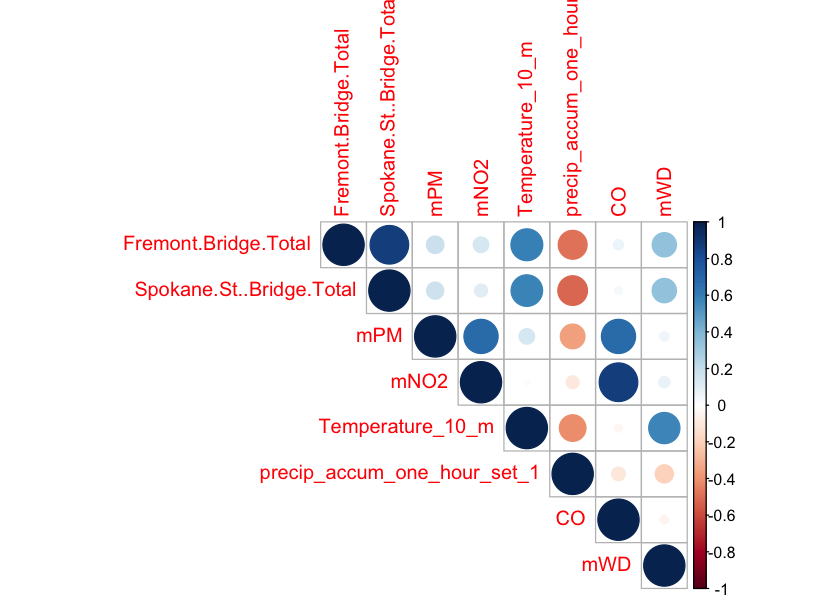

In [83]:
dfDcor= dfD%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM','mNO2','Temperature_10_m','precip_accum_one_hour_set_1', "CO","mWD")



dfDcor= drop_na(dfDcor)

corr_all<- round(cor(dfDcor, method = c("spearman")), 3)
corr_all

nrow(dfDcor)


corrplot(corr_all, type="upper")



## Plots of 

Warning message:
“Removed 74289 rows containing missing values (geom_path).”

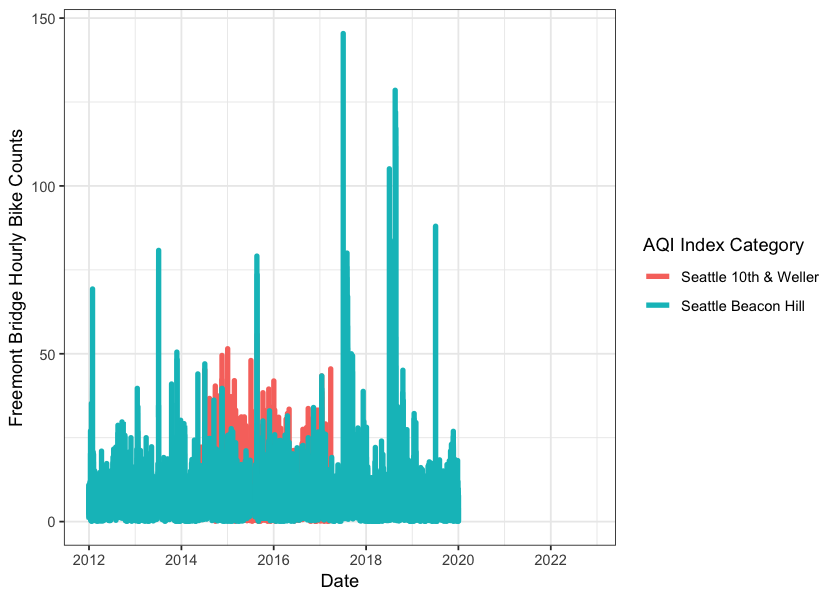

In [98]:
options(repr.plot.width=7, repr.plot.height=5)

ggplot(df, aes(x = Date, y = PM2.5_FEM, color = Site)) +
     geom_line(size = 1.5) +# facet_wrap(~  AQI_bucket_calculated, ncol=1)+
     theme_bw()+
    ylab('Freemont Bridge Hourly Bike Counts') +
    xlab('Date') +
    guides(color=guide_legend(title="AQI Index Category"))+
    theme_bw()

In [99]:
colnames(dfD)


[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2"                          "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "Ozone_8hr_avg"               
[19] "PM2.5_MO_24hr_avg"            "PM2.5_FEM_24hr_avg"          
[21] "CO_8hr_avg"                   "PM2.5MO_SubIndex"            
[23] "PM2.5FEM_SubIndex"            "PM2.5_1hrMO_SubIndex"        
[25] "PM2.5_1hrFEM_SubIndex"        "X03_SubIndex"                
[27] "CO_SubIndex"                  "SO2_SubIndex"                
[29] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[31] "AQI_calculated"               "Fremont.Bridge.Total"        
[33] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[35] "Spokane.St..Bridge.Total"     "West"                        
[37] "East"                         "precip_accum_one_hour_set_1" 
[39] "AQI_bucket_calculated"        "AQI_calculated_where"        
[41] "AQI_Cause"                    "mPM"                         
[43] "mNO2"                         "mWS"                         
[45] "mWD"

Warning message:
“Removed 2268 rows containing missing values (geom_path).”

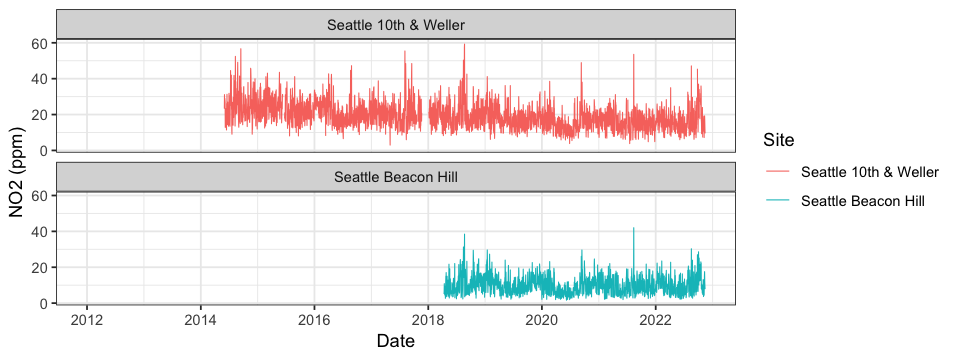

In [100]:
options(repr.plot.width=8, repr.plot.height=3)

ggplot(dfD, aes(x = Date, y = mNO2, color = Site)) +
     geom_line(size = .3) + facet_wrap(~  Site, ncol=1)+
     theme_bw()+
    ylab('NO2 (ppm)') +
    xlab('Date') +
    guides(color=guide_legend(title="Site"))+
    theme_bw()

In [101]:
dfD

X,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
0,Seattle 10th & Weller,2014-05-21,NA,NA,NA,NA,NA,9.100000,NA,...,729,789,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,9.100000,NA,NA,NA
1,Seattle 10th & Weller,2014-05-22,NA,NA,NA,NA,NA,8.336364,NA,...,756,795,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,8.336364,NA,NA,NA
2,Seattle 10th & Weller,2014-05-23,NA,NA,NA,NA,NA,6.591667,NA,...,359,392,3.140000,Good,PM2.5FEM_SubIndex,PM2.5,6.591667,NA,NA,NA
3,Seattle 10th & Weller,2014-05-24,NA,NA,NA,NA,NA,5.625000,NA,...,336,318,0.000000,Satisfactory,PM2.5FEM_SubIndex,PM2.5,5.625000,NA,NA,NA
4,Seattle 10th & Weller,2014-05-25,NA,NA,NA,NA,NA,6.104167,NA,...,186,180,0.600000,Good,PM2.5FEM_SubIndex,PM2.5,6.104167,NA,NA,NA
5,Seattle 10th & Weller,2014-05-26,NA,NA,NA,NA,NA,4.195833,NA,...,323,329,4.606667,Good,PM2.5FEM_SubIndex,PM2.5,4.195833,NA,NA,NA
6,Seattle 10th & Weller,2014-05-27,NA,NA,NA,NA,NA,4.766667,NA,...,722,760,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,4.766667,NA,NA,NA
7,Seattle 10th & Weller,2014-05-28,NA,NA,NA,NA,NA,6.921739,NA,...,507,554,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,6.921739,NA,NA,NA
8,Seattle 10th & Weller,2014-05-29,NA,NA,NA,NA,NA,9.360870,NA,...,651,702,0.090000,Good,PM2.5FEM_SubIndex,PM2.5,9.360870,NA,NA,NA
9,Seattle 10th & Weller,2014-05-30,NA,NA,NA,NA,NA,8.254167,NA,...,732,745,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,8.254167,NA,NA,NA


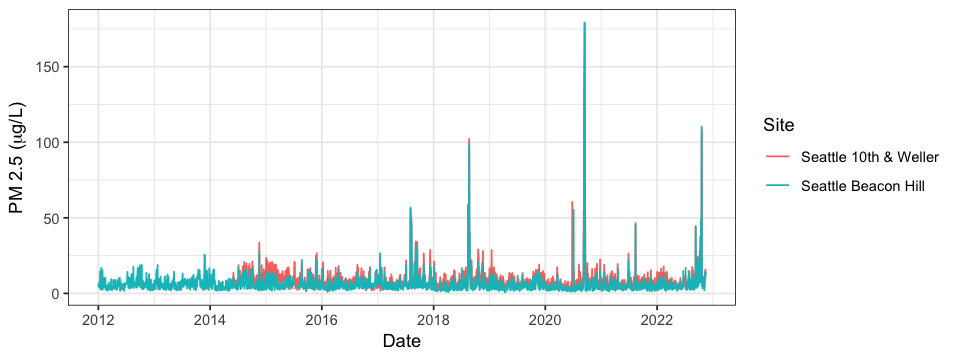

In [102]:
dfpm= dfD%>% 
  select('Site','Date', 'mPM', 'PM2.5_FEM', 'PM2.5_MO')


ggplot(dfD, aes(x = Date, y = mPM, color = Site)) +
     geom_line(size = .5) + #facet_wrap(~  Site, ncol=1)+
     theme_bw()+
    ylab(expression(paste("PM 2.5 (",mu,"g/L)"))) +
    xlab('Date') +
    guides(color=guide_legend(title="Site"))+
    theme_bw()

In [103]:
colnames(dfD)


[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2"                          "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "Ozone_8hr_avg"               
[19] "PM2.5_MO_24hr_avg"            "PM2.5_FEM_24hr_avg"          
[21] "CO_8hr_avg"                   "PM2.5MO_SubIndex"            
[23] "PM2.5FEM_SubIndex"            "PM2.5_1hrMO_SubIndex"        
[25] "PM2.5_1hrFEM_SubIndex"        "X03_SubIndex"                
[27] "CO_SubIndex"                  "SO2_SubIndex"                
[29] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[31] "AQI_calculated"               "Fremont.Bridge.Total"        
[33] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[35] "Spokane.St..Bridge.Total"     "West"                        
[37] "East"                         "precip_accum_one_hour_set_1" 
[39] "AQI_bucket_calculated"        "AQI_calculated_where"        
[41] "AQI_Cause"                    "mPM"                         
[43] "mNO2"                         "mWS"                         
[45] "mWD"

# Categories
- CO Y
- NO2 Y
- Ozone only one
- PM 2.5 Y
- SO2 only one
- RH
- Temperature Y (need to remove low values)
- AQI calculated Y
- Percipitation 

# Ozone

Warning message:
“Removed 3211 rows containing non-finite values (stat_bin).”

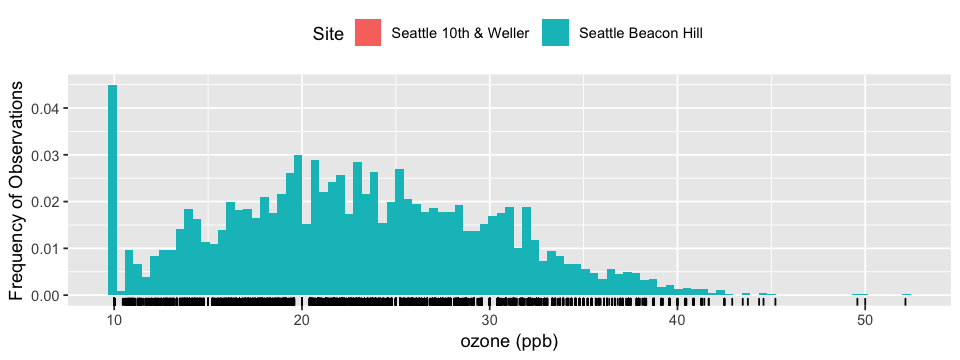

In [104]:
# Interleaved histograms
ggplot(dfD, aes(x=ozone, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.45)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('ozone (ppb)') +
geom_rug()

# SO2

Warning message:
“Removed 4593 rows containing non-finite values (stat_bin).”

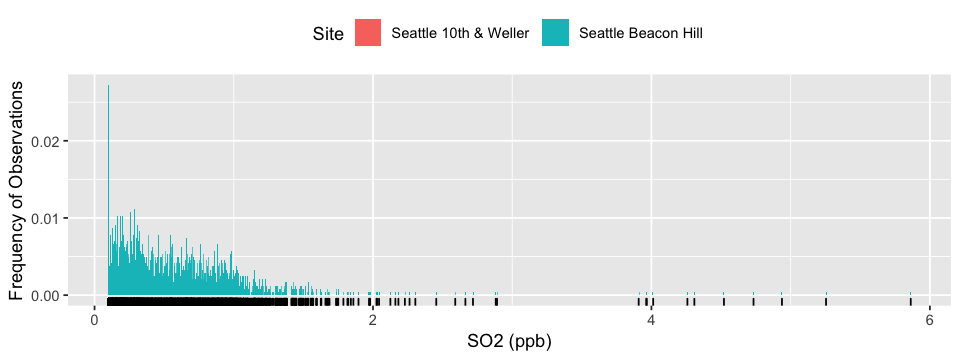

In [105]:
# Interleaved histograms
ggplot(dfD, aes(x=SO2, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.005)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('SO2 (ppb)') +
geom_rug()


# CO

Warning message:
“Removed 1600 rows containing non-finite values (stat_bin).”

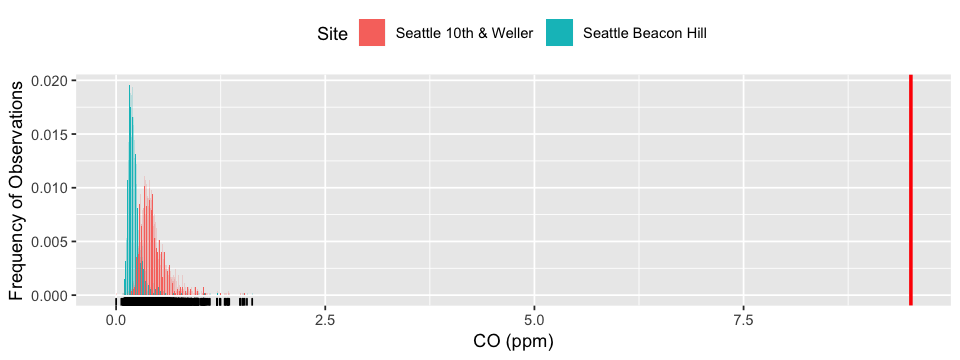

In [141]:
# Interleaved histograms
ggplot(dfD, aes(x=CO, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.005)+ #fill="white",
  theme(legend.position="top")+
geom_vline(xintercept=9.5,, color = "red", size=1)+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab('CO (ppm)') +
geom_rug()


# PM 2.5

Warning message:
“Removed 98 rows containing non-finite values (stat_bin).”

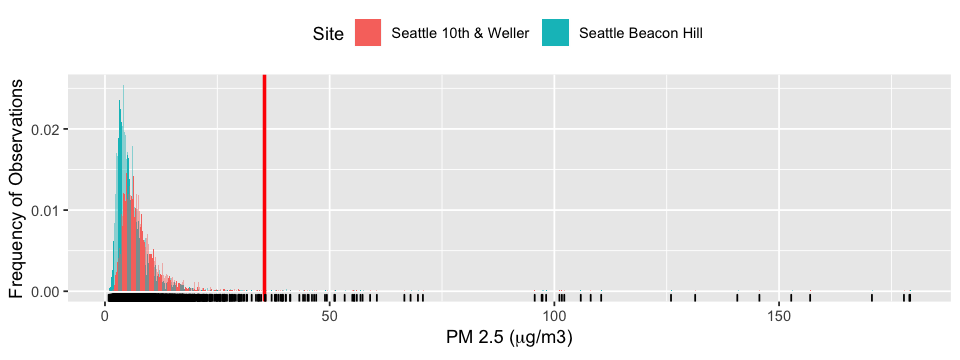

In [140]:
# Interleaved histograms
ggplot(dfD, aes(x=mPM, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
  geom_vline(aes(xintercept=35.5), size=1, color='red')+
#geom_vline(xintercept=35.5,linetype="dashed", color = "red")+
#geom_vline(data=filter(dfD, Site==" Seattle 10th & Weller"), aes(xintercept=mean(mPM)), colour="pink", linetype = "dashed")+

ylab('Frequency of Observations')+
xlab(expression(paste("PM 2.5 (",mu,"g/m3)"))) +
geom_rug()



# NO2

Warning message:
“Removed 2360 rows containing non-finite values (stat_bin).”

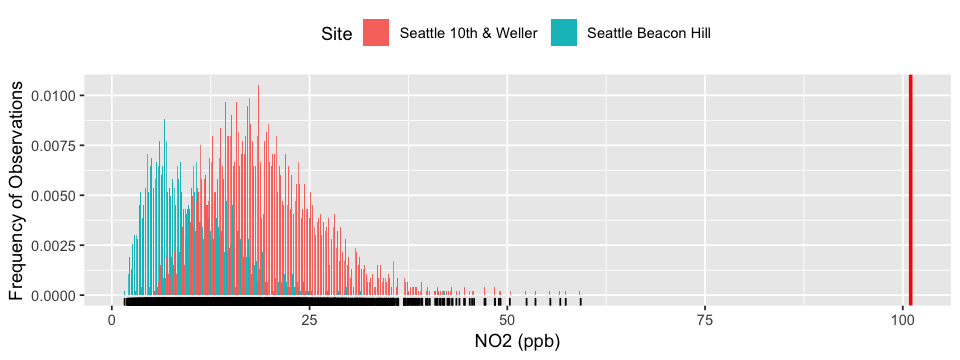

In [142]:
# Interleaved histograms
ggplot(dfD, aes(x=mNO2, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
  geom_vline(aes(xintercept=101), size=1, color='red')+
  #geom_vline(aes(xintercept=101, color="100 AQI Threshold"),, size=1) +
  #scale_color_manual(values = c("100 AQI Threshold" = "red")) +
ylab('Frequency of Observations')+
xlab('NO2 (ppb)') +
geom_rug()

# Temperature

Warning message:
“Removed 1610 rows containing non-finite values (stat_bin).”

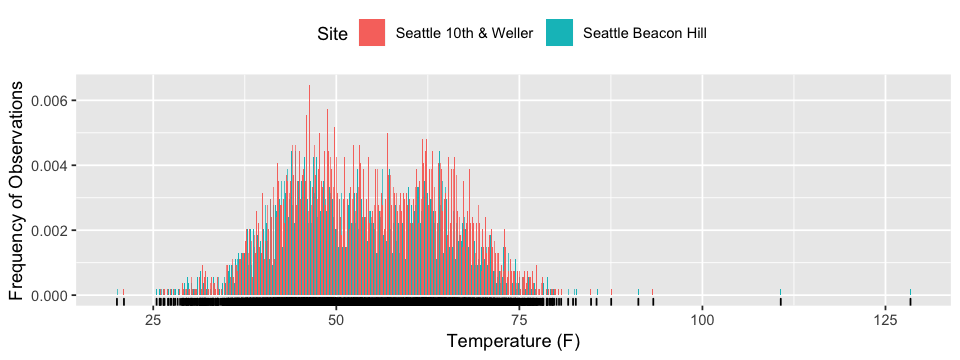

In [109]:
# Interleaved histograms
ggplot(dfD, aes(x=Temperature_10_m, fill=Site)) +
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
#geom_vline(xintercept=100, size=1, color = "red")+
ylab('Frequency of Observations')+
xlab('Temperature (F)') +
  #scale_x_continuous(limits= c(10,110))
geom_rug()

## AQI 

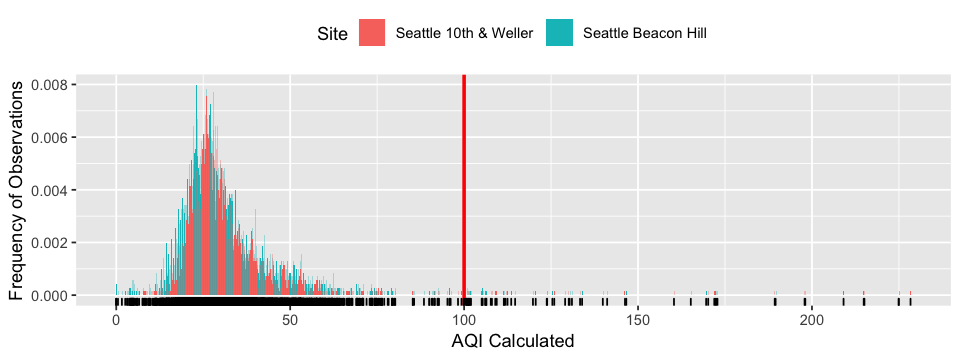

In [138]:
# Interleaved histograms
ggplot(dfD, aes(x= AQI_calculated, fill=Site)) +
#geom_rect(aes(xmin=0, xmax=50, ymin=0, ymax=Inf, alpha = .2, ))+
  geom_histogram(aes(y=..count../sum(..count..)), position="dodge", binwidth=.2)+ #fill="white",
  theme(legend.position="top")+
geom_vline(xintercept=100, size=1, color = "red")+
ylab('Frequency of Observations')+
xlab('AQI Calculated') +
geom_rug()

In [111]:
AQI_count_class <- df %>% 
  group_by(Site, AQI_bucket_calculated,) %>% 
  summarise(number_of_cases = n())

AQI_count_class

Site,AQI_bucket_calculated,number_of_cases
Seattle 10th & Weller,Good,67524
Seattle 10th & Weller,Satisfactory,5298
Seattle 10th & Weller,Moderate,637
Seattle 10th & Weller,Poor,63
Seattle Beacon Hill,Good,84754
Seattle Beacon Hill,Satisfactory,8588
Seattle Beacon Hill,Moderate,670
Seattle Beacon Hill,Poor,63


In [112]:
colnames(df)

[1] "Site"                        "Date"                       
 [3] "CO"                          "NO2"                        
 [5] "NO2_caps"                    "ozone"                      
 [7] "PM2.5_MO"                    "PM2.5_FEM"                  
 [9] "RH"                          "SO2"                        
[11] "Temperature"                 "Temperature_10_m"           
[13] "Wind_Direction_s"            "Wind_Direction_v"           
[15] "Wind_Speed_p"                "Wind_Speed_s"               
[17] "DOY"                         "Ozone_8hr_avg"              
[19] "PM2.5_MO_24hr_avg"           "PM2.5_FEM_24hr_avg"         
[21] "CO_8hr_avg"                  "PM2.5MO_SubIndex"           
[23] "PM2.5FEM_SubIndex"           "PM2.5_1hrMO_SubIndex"       
[25] "PM2.5_1hrFEM_SubIndex"       "X03_SubIndex"               
[27] "CO_SubIndex"                 "SO2_SubIndex"               
[29] "NO2_SubIndex"                "NO2_CAPS_SubIndex"          
[31] "AQI_calculated"              "AQI_bucket_calculated"      
[33] "AQI_calculated_where"        "AQI_Cause"                  
[35] "precip_accum_one_hour_set_1" "Fremont_Total"              
[37] "Fremont_East"                "Fremont_West"               
[39] "Spokane_Total"               "Spokane_West"               
[41] "Spokane_East"                "mPM"                        
[43] "mNO2"

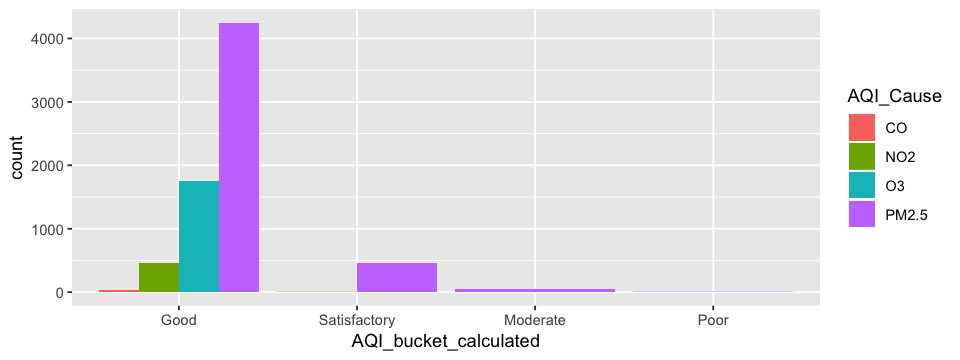

In [160]:
neworder <- c("Good","Satisfactory","Moderate", "Poor")
library(plyr)  ## or dplyr (transform -> mutate)
dfD <- arrange(transform(dfD,
             AQI_bucket_calculated=factor(AQI_bucket_calculated,levels=neworder)),AQI_bucket_calculated)

ggplot(dfD, aes(x=AQI_bucket_calculated, fill=AQI_Cause))  + 
    geom_bar(position="dodge") 
    #facet_wrap(~  Site, ncol=1)

# Model Analysis

In [161]:
colnames(dfD)

[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2"                          "NO2_caps"                    
 [7] "ozone"                        "PM2.5_MO"                    
 [9] "PM2.5_FEM"                    "RH"                          
[11] "SO2"                          "Temperature"                 
[13] "Temperature_10_m"             "Wind_Direction_s"            
[15] "Wind_Direction_v"             "Wind_Speed_p"                
[17] "Wind_Speed_s"                 "Ozone_8hr_avg"               
[19] "PM2.5_MO_24hr_avg"            "PM2.5_FEM_24hr_avg"          
[21] "CO_8hr_avg"                   "PM2.5MO_SubIndex"            
[23] "PM2.5FEM_SubIndex"            "PM2.5_1hrMO_SubIndex"        
[25] "PM2.5_1hrFEM_SubIndex"        "X03_SubIndex"                
[27] "CO_SubIndex"                  "SO2_SubIndex"                
[29] "NO2_SubIndex"                 "NO2_CAPS_SubIndex"           
[31] "AQI_calculated"               "Fremont.Bridge.Total"        
[33] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"
[35] "Spokane.St..Bridge.Total"     "West"                        
[37] "East"                         "precip_accum_one_hour_set_1" 
[39] "AQI_bucket_calculated"        "AQI_calculated_where"        
[41] "AQI_Cause"                    "mPM"                         
[43] "mNO2"                         "mWS"                         
[45] "mWD"

,Fremont.Bridge.Total,Spokane.St..Bridge.Total,mPM,mNO2,Temperature_10_m,precip_accum_one_hour_set_1,CO,mWD
Fremont.Bridge.Total,1.000,0.874,0.181,0.143,0.597,-0.490,0.062,0.347
Spokane.St..Bridge.Total,0.874,1.000,0.173,0.100,0.584,-0.517,0.038,0.349
mPM,0.181,0.173,1.000,0.687,0.142,-0.359,0.686,0.053
mNO2,0.143,0.100,0.687,1.000,-0.020,-0.097,0.877,0.076
Temperature_10_m,0.597,0.584,0.142,-0.020,1.000,-0.415,-0.037,0.572
precip_accum_one_hour_set_1,-0.490,-0.517,-0.359,-0.097,-0.415,1.000,-0.110,-0.195
CO,0.062,0.038,0.686,0.877,-0.037,-0.110,1.000,-0.042
mWD,0.347,0.349,0.053,0.076,0.572,-0.195,-0.042,1.000


[1] 3900

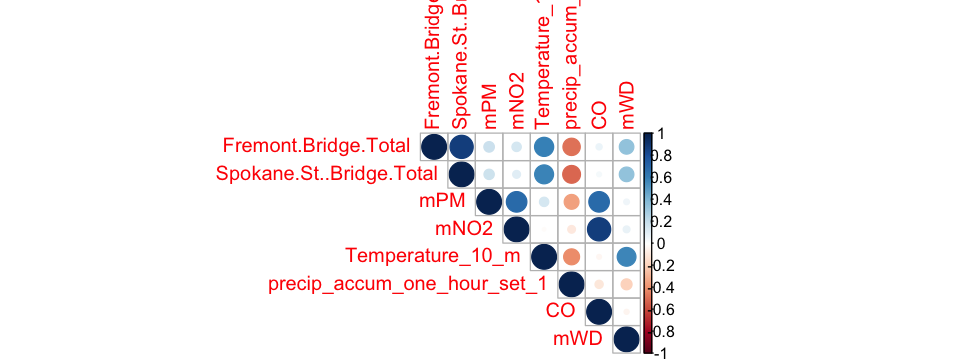

In [143]:
dfDcor= dfD%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM','mNO2','Temperature_10_m','precip_accum_one_hour_set_1', "CO","mWD")



dfDcor= drop_na(dfDcor)

corr_all<- round(cor(dfDcor, method = c("spearman")), 3)
corr_all

nrow(dfDcor)


corrplot(corr_all, type="upper")

In [158]:
head(beacon)

,X,Site,Date,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
3084,3100,Seattle Beacon Hill,2012-01-01,NA,NA,16.25000,NA,6.350000,60.62500,NA,...,NA,NA,0.12000,Good,PM2.5FEM_SubIndex,PM2.5,6.350000,NA,2.212500,219.2917
3085,3101,Seattle Beacon Hill,2012-01-02,NA,NA,20.55556,NA,5.076471,69.91667,NA,...,NA,NA,0.25000,Good,PM2.5FEM_SubIndex,PM2.5,5.076471,NA,5.162500,158.9583
3086,3102,Seattle Beacon Hill,2012-01-03,NA,NA,16.42857,NA,4.600000,83.95833,NA,...,NA,NA,10.49500,Good,PM2.5FEM_SubIndex,PM2.5,4.600000,NA,3.333333,167.5000
3087,3103,Seattle Beacon Hill,2012-01-04,NA,NA,16.11111,NA,4.935294,86.29167,NA,...,NA,NA,14.98833,Good,PM2.5FEM_SubIndex,PM2.5,4.935294,NA,5.729167,182.9167
3088,3104,Seattle Beacon Hill,2012-01-05,NA,NA,24.16667,NA,4.508333,82.87500,NA,...,NA,NA,5.62000,Good,PM2.5FEM_SubIndex,PM2.5,4.508333,NA,6.587500,191.9167
3089,3105,Seattle Beacon Hill,2012-01-06,NA,NA,11.25000,NA,6.025000,90.54167,NA,...,NA,NA,0.75000,Good,PM2.5FEM_SubIndex,PM2.5,6.025000,NA,2.637500,163.4167


,Spokane.St..Bridge.Total,mPM,Temperature_10_m,precip_accum_one_hour_set_1
Spokane.St..Bridge.Total,1.000,0.142,0.598,-0.517
mPM,0.142,1.000,0.112,-0.417
Temperature_10_m,0.598,0.112,1.000,-0.409
precip_accum_one_hour_set_1,-0.517,-0.417,-0.409,1.000


[1] 3934

[1] 2187

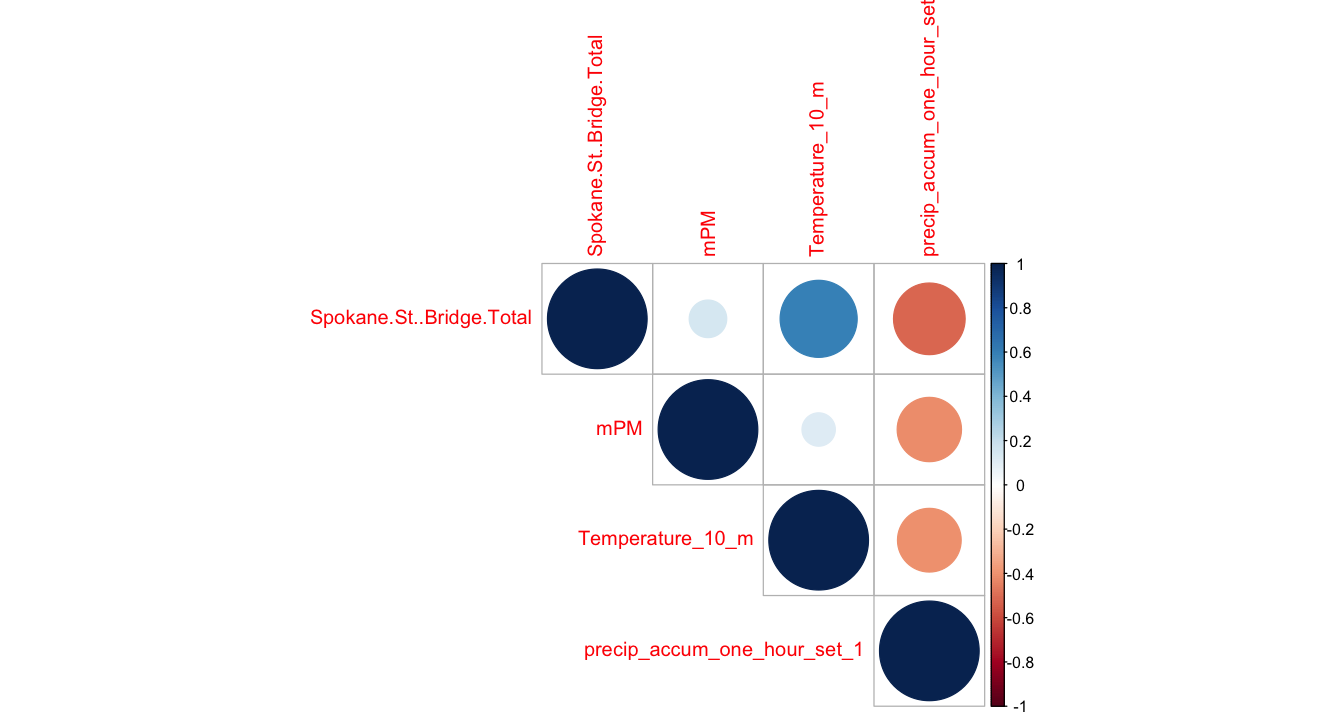

In [228]:
beaconcor= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m', 'precip_accum_one_hour_set_1' )



dfDcor= drop_na(beaconcor)

corr_all<- round(cor(dfDcor, method = c("spearman")), 3)
corr_all

nrow(beacon)
nrow(dfDcor)


corrplot(corr_all, type="upper")

In [246]:
beaconlr= beacon%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select('Spokane.St..Bridge.Total', 'mPM','precip_accum_one_hour_set_1', 'Temperature_10_m',)

beaconlr= drop_na(beaconlr)
ya1 <- lm(Spokane.St..Bridge.Total ~. , data = beaconlr)
summary(ya1)




Call:
lm(formula = Spokane.St..Bridge.Total ~ ., data = beaconlr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1273.99  -184.42    21.07   210.03  1059.14 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -173.8754    34.7202  -5.008 5.94e-07 ***
mPM                           -4.5251     0.7064  -6.405 1.83e-10 ***
precip_accum_one_hour_set_1  -21.8762     1.4806 -14.775  < 2e-16 ***
Temperature_10_m              19.2229     0.6245  30.779  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 308.1 on 2183 degrees of freedom
Multiple R-squared:  0.3938,	Adjusted R-squared:  0.393 
F-statistic: 472.8 on 3 and 2183 DF,  p-value: < 2.2e-16


In [172]:
colnames(weller)

[1] "X"                            "Site"                        
 [3] "Date"                         "CO"                          
 [5] "NO2"                          "PM2.5_MO"                    
 [7] "PM2.5_FEM"                    "Temperature_10_m"            
 [9] "Wind_Direction_s"             "Wind_Speed_s"                
[11] "Ozone_8hr_avg"                "PM2.5_MO_24hr_avg"           
[13] "PM2.5_FEM_24hr_avg"           "CO_8hr_avg"                  
[15] "PM2.5MO_SubIndex"             "PM2.5FEM_SubIndex"           
[17] "PM2.5_1hrMO_SubIndex"         "PM2.5_1hrFEM_SubIndex"       
[19] "X03_SubIndex"                 "CO_SubIndex"                 
[21] "SO2_SubIndex"                 "NO2_SubIndex"                
[23] "NO2_CAPS_SubIndex"            "AQI_calculated"              
[25] "Fremont.Bridge.Total"         "Fremont.Bridge.East.Sidewalk"
[27] "Fremont.Bridge.West.Sidewalk" "Spokane.St..Bridge.Total"    
[29] "West"                         "East"                        
[31] "precip_accum_one_hour_set_1"  "AQI_bucket_calculated"       
[33] "AQI_calculated_where"         "AQI_Cause"                   
[35] "mPM"                          "mNO2"                        
[37] "mWS"                          "mWD"

In [250]:
freemontlr= weller%>% 
  #select('Fremont.Bridge.Total','Spokane.St..Bridge.Total', 'mPM', 'mNO2','Temperature_10_m','precip_accum_one_hour_set_1','AQI_calculated', "CO","mWD", 'mWS')
  #select('Spokane.St..Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1',)
  select("Date",'Fremont.Bridge.Total', 'mPM','Temperature_10_m','precip_accum_one_hour_set_1')

freemontlr= drop_na(freemontlr)

fit.fMR <- lm(
  Fremont.Bridge.Total ~ mPM + Temperature_10_m +  , data = freemontlr)
summary(fit.fMR)



Call:
lm(formula = Fremont.Bridge.Total ~ ., data = freemontlr)

Residuals:
    Min      1Q  Median      3Q     Max 
-3674.9  -707.2   -46.5   684.7  2943.5 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3299.79773  397.73147   8.297   <2e-16 ***
Date                          -0.22796    0.02141 -10.646   <2e-16 ***
mPM                          -11.50377    2.15434  -5.340    1e-07 ***
Temperature_10_m              66.18442    1.80358  36.696   <2e-16 ***
precip_accum_one_hour_set_1  -63.89538    3.81676 -16.741   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1001 on 2905 degrees of freedom
Multiple R-squared:  0.4156,	Adjusted R-squared:  0.4148 
F-statistic: 516.6 on 4 and 2905 DF,  p-value: < 2.2e-16


In [195]:
# https://otexts.com/fpp2/selecting-predictors.html

In [252]:
freemontlr$LR = predict(fit.fMR)

In [253]:
summary(freemontlr)

      Date            Fremont.Bridge.Total      mPM          Temperature_10_m
 Min.   :2014-06-18   Min.   :  11         Min.   :  1.100   Min.   :21.00   
 1st Qu.:2016-07-10   1st Qu.:1661         1st Qu.:  5.011   1st Qu.:46.33   
 Median :2018-08-06   Median :2534         Median :  6.875   Median :54.42   
 Mean   :2018-07-28   Mean   :2634         Mean   :  8.452   Mean   :54.68   
 3rd Qu.:2020-08-16   3rd Qu.:3499         3rd Qu.:  9.500   3rd Qu.:63.07   
 Max.   :2022-09-30   Max.   :6428         Max.   :179.000   Max.   :93.29   
 precip_accum_one_hour_set_1       LR        
 Min.   : 0.000              Min.   : 200.4  
 1st Qu.: 0.000              1st Qu.:2031.6  
 Median : 0.000              Median :2618.6  
 Mean   : 2.247              Mean   :2633.7  
 3rd Qu.: 2.174              3rd Qu.:3241.8  
 Max.   :55.777              Max.   :5326.1  

In [254]:
head(freemontlr)

,Date,Fremont.Bridge.Total,mPM,Temperature_10_m,precip_accum_one_hour_set_1,LR
29,2014-06-18,4650,8.744444,57.45455,0.00,2833.417
30,2014-06-19,4412,6.458333,57.95833,0.00,2883.860
31,2014-06-20,3790,5.395833,57.00000,1.04,2820.795
32,2014-06-21,3204,5.241667,61.16667,0.00,3124.008
33,2014-06-22,2714,6.179167,64.45833,0.00,3357.108
34,2014-06-23,4477,7.662500,65.95833,0.00,3456.911


In [255]:
head(freemontlr[order(freemontlr$LR),])

,Date,Fremont.Bridge.Total,mPM,Temperature_10_m,precip_accum_one_hour_set_1,LR
2762,2021-12-27,74,6.833333,21.00000,0.9071429,200.3924
2761,2021-12-26,54,5.173913,25.91667,5.0419167,567.1642
1705,2019-02-04,260,5.041667,26.41667,4.6977243,604.2412
2763,2021-12-28,91,5.583333,26.54167,1.1754762,610.0171
1706,2019-02-05,344,11.166667,27.33333,0.0000000,633.5136
2764,2021-12-29,75,6.166667,27.04167,0.1500000,642.7447


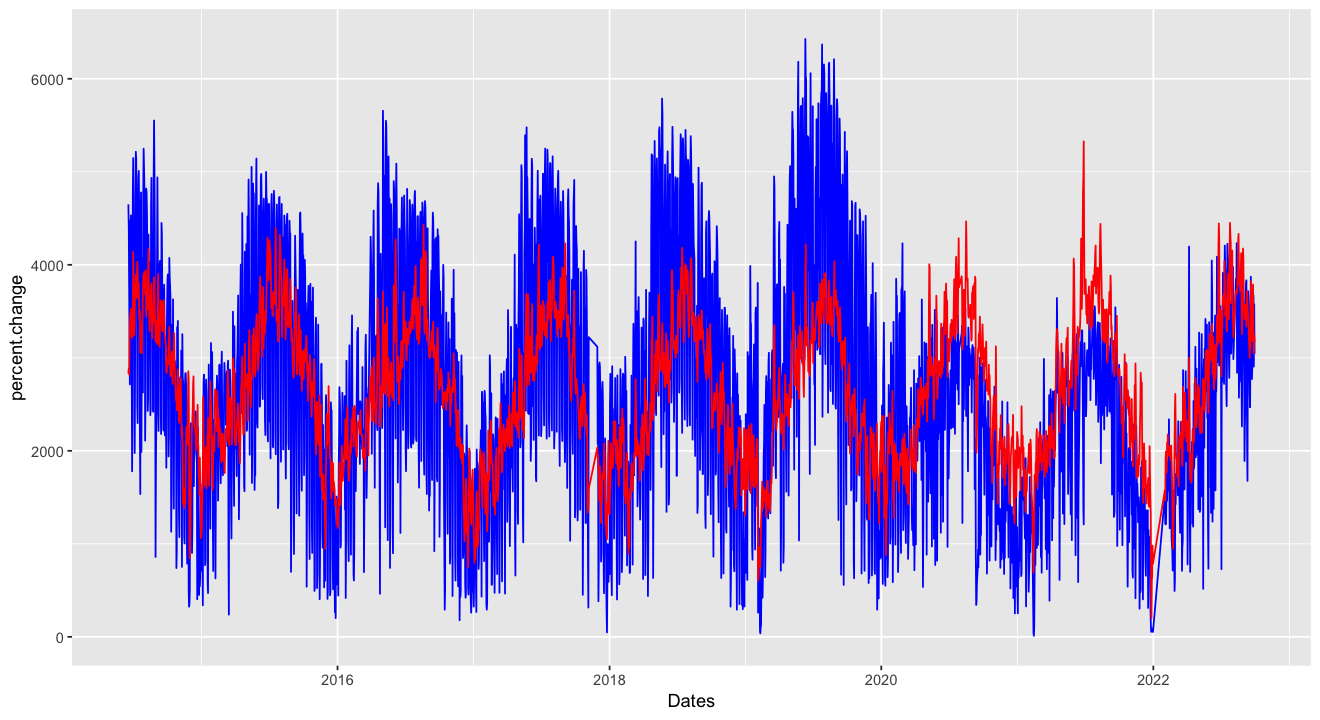

In [256]:
p = ggplot() + 
  geom_line(data = freemontlr, aes(x = Date, y = Fremont.Bridge.Total), color = "blue") +
  geom_line(data = freemontlr, aes(x = Date, y = LR), color = "red") +
  xlab('Dates') +
  ylab('percent.change')

print(p)

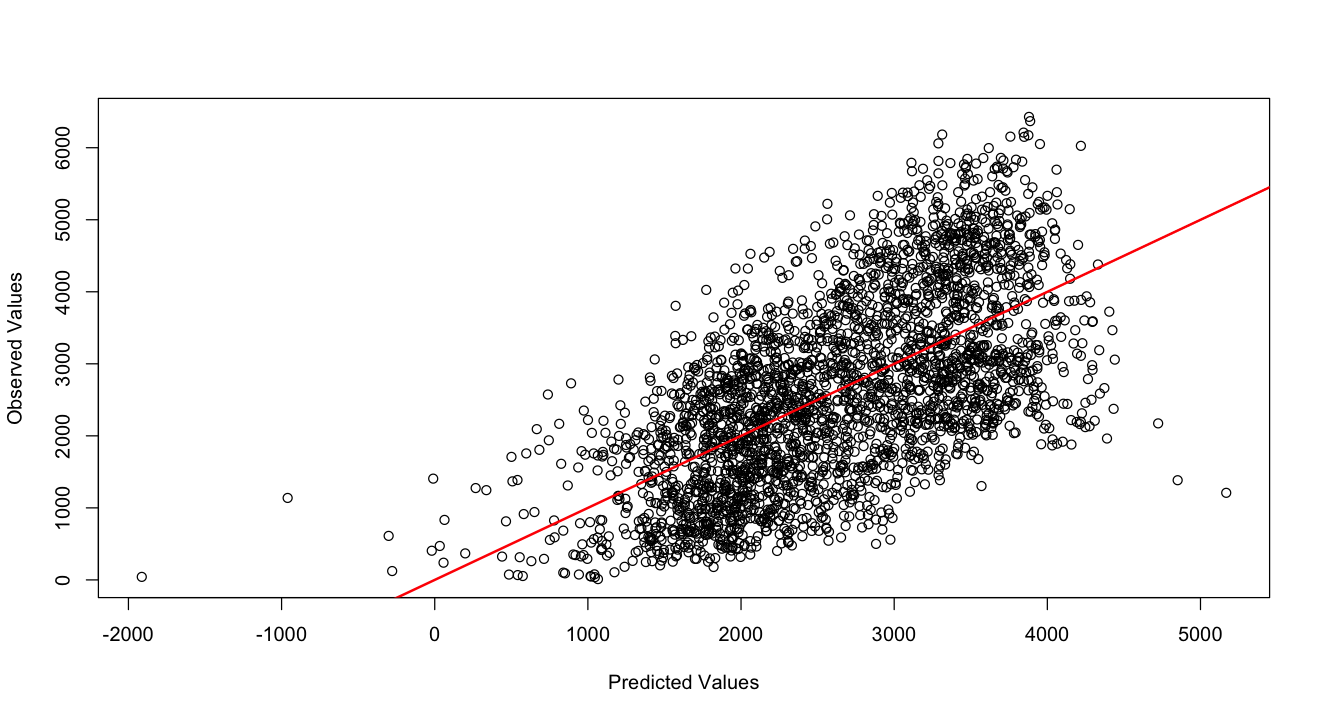

In [197]:
plot(predict(fit.fMR),                                # Draw plot using Base R
     freemontlr$Fremont.Bridge.Total,
     xlab = "Predicted Values",
     ylab = "Observed Values")
abline(a = 0,                                        # Add straight line
       b = 1,
       col = "red",
       lwd = 2)


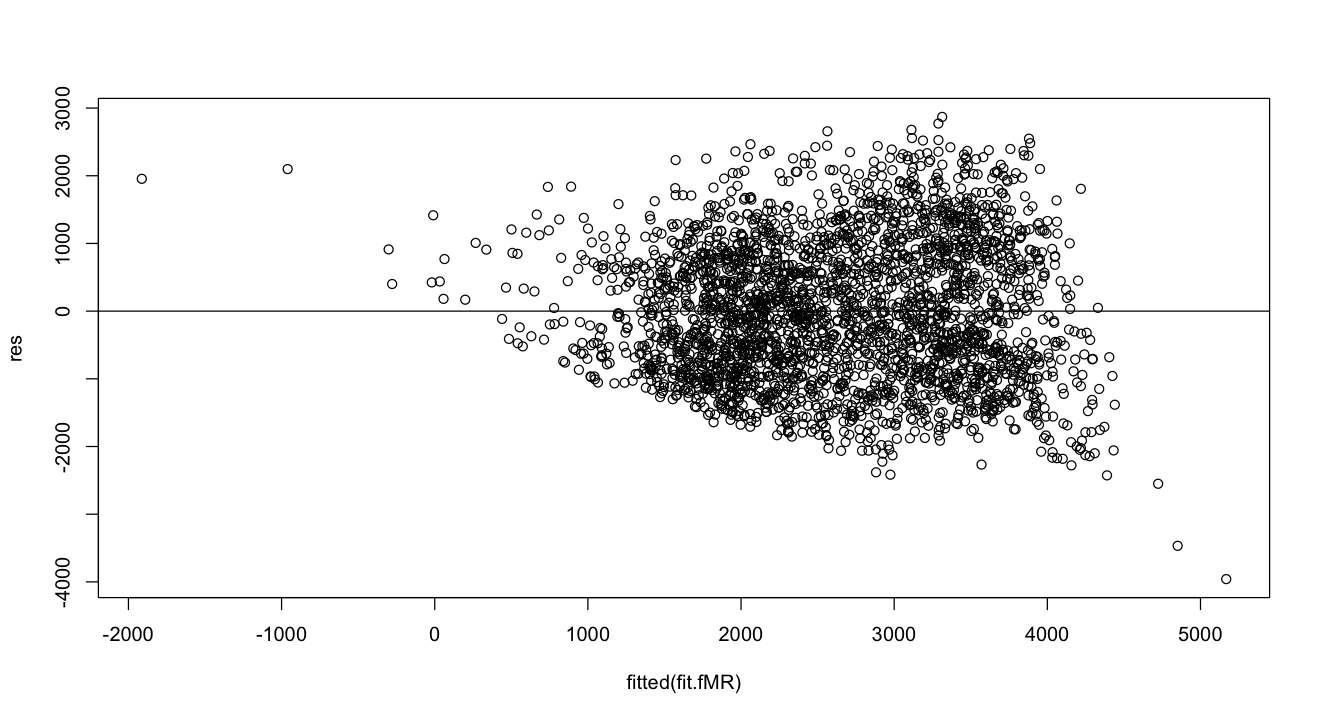

In [193]:
res <- resid(fit.fMR)
#produce residual vs. fitted plot
plot(fitted(fit.fMR), res)

#add a horizontal line at 0 
abline(0,0)

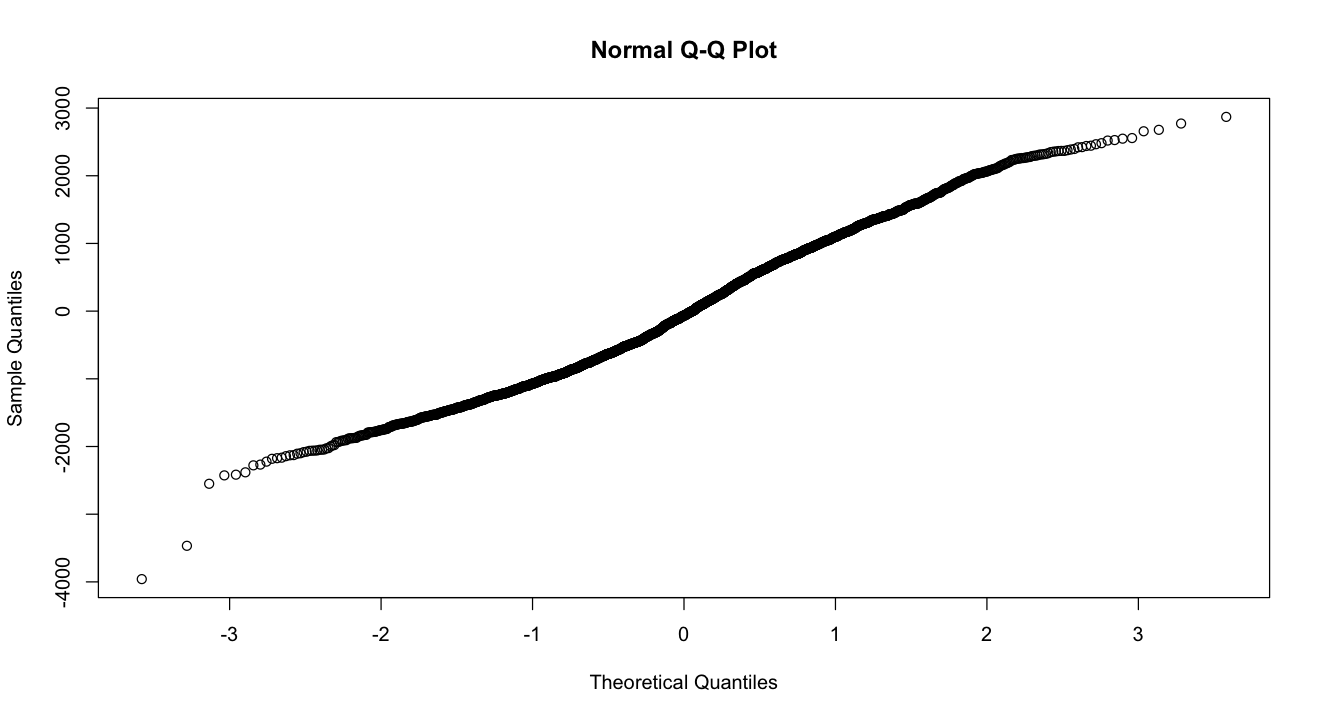

In [194]:
qqnorm(res)

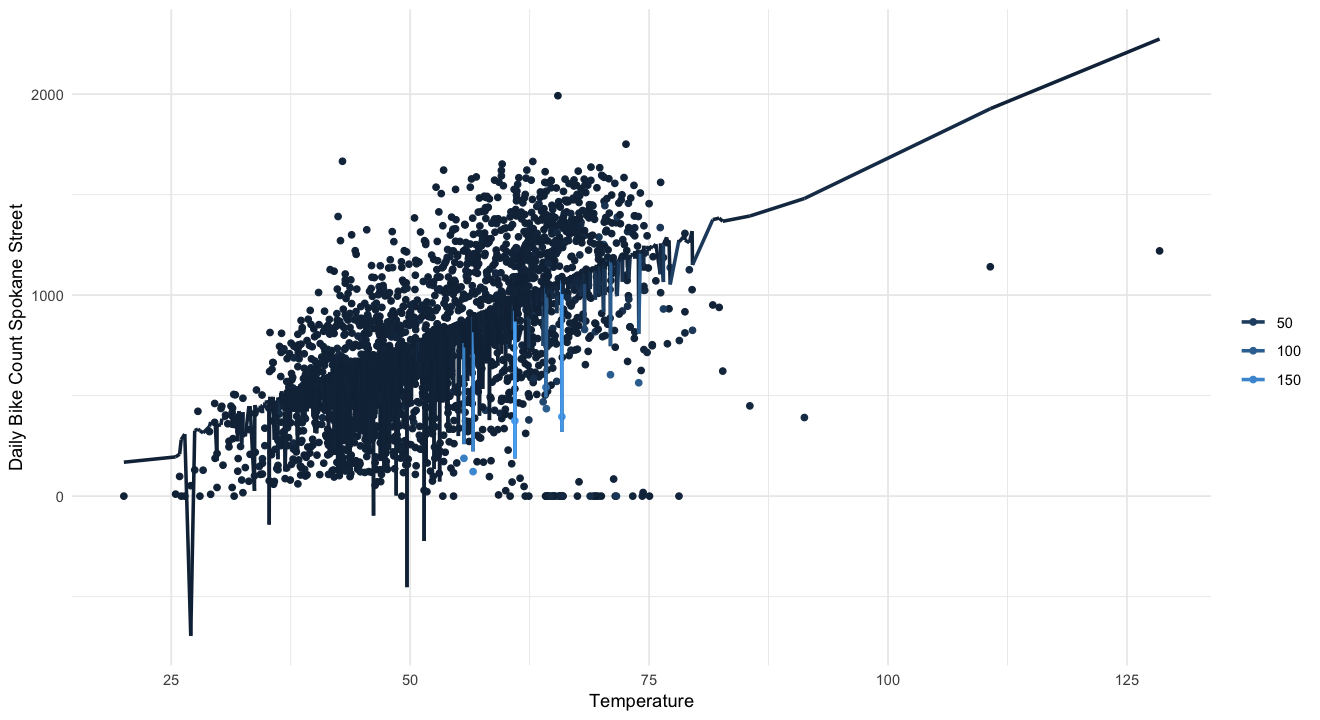

In [170]:
options(repr.plot.width=11, repr.plot.height=6) #controls plot size in jupyter

beaconlr$predlm = predict(ya1)

#https://aosmith.rbind.io/2018/11/16/plot-fitted-lines/

ggplot(beaconlr, aes(x = Temperature_10_m , y = Spokane.St..Bridge.Total, color = mPM) ) +
     geom_point() +
     geom_line(aes(y = predlm), size = 1)+ylab('Daily Bike Count Spokane Street') +
guides(color=guide_legend(title=""))+theme_minimal()+ xlab('Temperature') 
#scale_color_manual(values=c( "slategray4","springgreen3"))+
#plot_annotation(
#  title = 'MLR Model for predicting FAEC using Pool Size and Satellite Temperature',
#  subtitle ='FAEC (kWh) = 6,584,061 - 3,483,606 x Small Pool - 176,609  x Mean Annual Satellite Temperature, C',   theme = theme(plot.title = element_text(size = 16), plot.subtitle = element_text(size = 12)), 
                  
                  #'Annual Energy Consumption = x1 * pool size + x2 * mean annual satelite temperature + intercept',
  #caption = 'By Amanda Worthy'
#)+
#  scale_x_continuous(breaks = c(-2, -1,0,1, 2,3, 4, 5,6,7, 8, 9,10))+
   #scale_x_continuous(breaks = c(-2,0,2, 4,6, 8, 10))+
  #scale_y_continuous(limits = c(0, 8*10**6))+
#theme(text = element_text(size = 14))
